# **Analyzing the factors that contribute to a movie's success - EDA**

**Goal**

*Goal of the project is to identify the influential factors that contribute to a movie's success by analysing various aspects such as genre, release date,budget, revenue and so on.This project aims to provide valuable insights to help filmmakers make informed decisions about which genre movies are popular among people, which companies to partner with and how to allocate resources effieciently to maximize the chances of success.*






*Python used for analysis*

**Import Libraries**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read Dataset**

In [108]:
df=pd.read_csv("/content/movies-New.csv")
df.head()

,id,title,genres,original_language,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count
0,823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,10484.676,Legendary Pictures-Warner Bros. Pictures,2024/03/27,150000000,558503759,115.0,Released,7.246,1878
1,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023/08/02,129000000,352056482,116.0,Released,7.079,1365
2,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023/04/05,18000000,65675816,103.0,Released,7.433,545
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023/06/06,200000000,407045464,127.0,Released,7.340,1007
4,693134,Dune: Part Two,Science Fiction-Adventure,en,4742.163,Legendary Pictures,2024/02/27,190000000,683813734,167.0,Released,8.300,2770


**Data Pre-Processing**

***Checking for missing Data***

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722425 entries, 0 to 722424
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722425 non-null  int64  
 1   title                 722419 non-null  object 
 2   genres                511982 non-null  object 
 3   original_language     722425 non-null  object 
 4   popularity            722425 non-null  float64
 5   production_companies  337281 non-null  object 
 6   release_date          670655 non-null  object 
 7   budget                722425 non-null  int64  
 8   revenue               722425 non-null  int64  
 9   runtime               688067 non-null  float64
 10  status                722425 non-null  object 
 11  vote_average          722425 non-null  float64
 12  vote_count            722425 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 71.7+ MB


***Checking no.of rows and columns in the dataset***

In [110]:
df.shape

(722425, 13)

In [111]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,vote_count
count,722425.000000,722425.000000,7.224250e+05,7.224250e+05,6.880670e+05,722425.000000,722425.000000
mean,526920.706495,1.885521,4.003336e+05,9.966087e+05,1.990483e+02,2.445522,28.156382
std,253187.428875,24.737037,8.196214e+06,2.034295e+07,8.583727e+04,3.176286,390.839366
min,2.000000,0.000000,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000,0.000000
25%,328923.000000,0.600000,0.000000e+00,0.000000e+00,5.000000e+00,0.000000,0.000000
50%,533354.000000,0.600000,0.000000e+00,0.000000e+00,5.000000e+01,0.000000,0.000000
75%,737852.000000,1.301000,0.000000e+00,0.000000e+00,9.000000e+01,5.600000,2.000000
max,968161.000000,10484.676000,5.000000e+09,2.920357e+09,5.050505e+07,10.000000,33262.000000


Describe function used to get comprehensive overview of the data. The output shows statistics such as count,mean,standard deviation,min,max and quartiles.

This dataset has outliers
*   Minimun revenue shows as negative values
*   Budget and Revenue shows as zero for all 3 quartiles
*   Runtime shows higher standard deviation






***Check Duplicate Records***

In [112]:
duplicates=df.duplicated(subset='id').sum()
duplicates

60356

***Drop Duplicate Records***

In [113]:
df = df.drop_duplicates(subset='id',keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662069 entries, 0 to 722424
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    662069 non-null  int64  
 1   title                 662063 non-null  object 
 2   genres                462807 non-null  object 
 3   original_language     662069 non-null  object 
 4   popularity            662069 non-null  float64
 5   production_companies  303718 non-null  object 
 6   release_date          611756 non-null  object 
 7   budget                662069 non-null  int64  
 8   revenue               662069 non-null  int64  
 9   runtime               629771 non-null  float64
 10  status                662069 non-null  object 
 11  vote_average          662069 non-null  float64
 12  vote_count            662069 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 70.7+ MB


***Check status values***

In [114]:
statusval=df['status'].unique()
statusval

array(['Released', 'Post Production', 'In Production', 'Planned',
       'Canceled', 'Rumored'], dtype=object)

I am going to consider only released movies because financial and popularity metrics are meaningful only for released movies. Leaving unreleased movies will skew the analysis and lead to incorrect conclusion.

***Filter only released status***

In [115]:
df=df[df['status']=="Released"]


Now status column has only "Released" value. So we can drop this column to streamline the dataset.

***Drop Status column***

In [116]:
df=df.drop('status',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657045 entries, 0 to 722424
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    657045 non-null  int64  
 1   title                 657040 non-null  object 
 2   genres                459020 non-null  object 
 3   original_language     657045 non-null  object 
 4   popularity            657045 non-null  float64
 5   production_companies  300820 non-null  object 
 6   release_date          611545 non-null  object 
 7   budget                657045 non-null  int64  
 8   revenue               657045 non-null  int64  
 9   runtime               625351 non-null  float64
 10  vote_average          657045 non-null  float64
 11  vote_count            657045 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 65.2+ MB


***Drop release date null records***

In [117]:
df.dropna(subset=['release_date'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611545 entries, 0 to 722424
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    611545 non-null  int64  
 1   title                 611543 non-null  object 
 2   genres                448888 non-null  object 
 3   original_language     611545 non-null  object 
 4   popularity            611545 non-null  float64
 5   production_companies  297656 non-null  object 
 6   release_date          611545 non-null  object 
 7   budget                611545 non-null  int64  
 8   revenue               611545 non-null  int64  
 9   runtime               585612 non-null  float64
 10  vote_average          611545 non-null  float64
 11  vote_count            611545 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 60.7+ MB


***drop unknown tiltle movies***

In [118]:
df.dropna(subset=['title'],inplace=True)

To reduce the size of data and visualisation clarity, i am going to analyse last 10 years movies list

***Split release date into Year and Month for detailed analysis***

In [119]:
df['release_year']=df['release_date'].astype(str).str[:4].astype(int)


In [120]:
df['release_month']=df['release_date'].astype(str).str[5:7].astype(int)


In [121]:
df=df.drop('release_date',axis=1)

In [122]:
df= df[df['release_year'] > 2013]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224219 entries, 0 to 722421
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    224219 non-null  int64  
 1   title                 224219 non-null  object 
 2   genres                167939 non-null  object 
 3   original_language     224219 non-null  object 
 4   popularity            224219 non-null  float64
 5   production_companies  99626 non-null   object 
 6   budget                224219 non-null  int64  
 7   revenue               224219 non-null  int64  
 8   runtime               218045 non-null  float64
 9   vote_average          224219 non-null  float64
 10  vote_count            224219 non-null  int64  
 11  release_year          224219 non-null  int64  
 12  release_month         224219 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 23.9+ MB


***Get only records which has value for revenue***

In [123]:
df=df[df['revenue'] > 0 ]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5349 entries, 0 to 722138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5349 non-null   int64  
 1   title                 5349 non-null   object 
 2   genres                5207 non-null   object 
 3   original_language     5349 non-null   object 
 4   popularity            5349 non-null   float64
 5   production_companies  4784 non-null   object 
 6   budget                5349 non-null   int64  
 7   revenue               5349 non-null   int64  
 8   runtime               5325 non-null   float64
 9   vote_average          5349 non-null   float64
 10  vote_count            5349 non-null   int64  
 11  release_year          5349 non-null   int64  
 12  release_month         5349 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 585.0+ KB


In [124]:
df['genres'] = df['genres'].fillna('N/A')

In [125]:
df['runtime']=df['runtime'].fillna(df['runtime'].median())

**Data Analysis**

***Scatter Plot with Regression Line***

Text(0.5, 1.0, 'Revenue vs Budget')

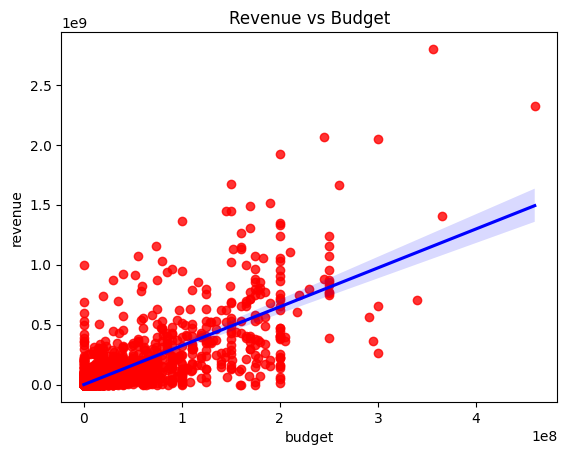

In [126]:
sns.regplot(x="budget", y="revenue", data=df, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('Revenue vs Budget')

From this scatterplot, we can determine the positive relationship between budget and revenue of the movie.

To analyze further, let's find all other variables that correlate with revenue.

***Update all columns with numerical values***

By doing this, we can analyze all the variables that correlate with revenue, not just the numerical ones. This will help us understand which variables are strongly or weakly correlated with revenue.

In [127]:
df_numeric=df.copy()

for col in df_numeric.columns:
  if(df_numeric[col].dtypes =="object"):
    df_numeric[col]=df_numeric[col].astype('category')
    df_numeric[col]=df_numeric[col].cat.codes

df_numeric

,id,title,genres,original_language,popularity,production_companies,budget,revenue,runtime,vote_average,vote_count,release_year,release_month
0,823464,1612,1097,15,10484.676,2041,150000000,558503759,115.0,7.246,1878,2024,3
1,615656,2574,157,15,8763.998,295,129000000,352056482,116.0,7.079,1365,2023,8
2,758323,4541,965,15,5953.227,3172,18000000,65675816,103.0,7.433,545,2023,4
3,667538,4859,38,15,5409.104,3313,200000000,407045464,127.0,7.340,1007,2023,6
4,693134,1229,1115,15,4742.163,2032,190000000,683813734,167.0,8.300,2770,2024,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
719510,547005,1157,597,74,0.600,-1,0,771738,100.0,0.000,0,2018,7
720515,554742,3477,458,15,0.600,-1,0,75,1.0,10.000,1,2016,4
721797,506977,11,654,19,0.600,4270,15000,50000,90.0,0.000,0,2014,6
721933,545416,1561,751,15,0.600,-1,0,250,5.0,0.000,0,2016,3


In [128]:
corr=df_numeric.corr()
corr

,id,title,genres,original_language,popularity,production_companies,budget,revenue,runtime,vote_average,vote_count,release_year,release_month
id,1.000000,-0.003583,0.053269,0.026139,0.044715,-0.106317,-0.225379,-0.189337,-0.377760,-0.180616,-0.297627,0.772451,0.033146
title,-0.003583,1.000000,0.005771,-0.007230,-0.003696,0.025460,-0.002345,-0.017978,0.000625,0.002982,-0.012470,0.006088,-0.000735
genres,0.053269,0.005771,1.000000,-0.034119,-0.018512,-0.081281,-0.177352,-0.145136,-0.093032,-0.085614,-0.098787,0.014739,0.028835
original_language,0.026139,-0.007230,-0.034119,1.000000,-0.054111,-0.042708,-0.157243,-0.082275,0.076734,-0.026246,-0.184825,-0.075175,-0.040588
popularity,0.044715,-0.003696,-0.018512,-0.054111,1.000000,0.022282,0.227726,0.166270,0.071656,0.057402,0.078990,0.159497,-0.016792
production_companies,-0.106317,0.025460,-0.081281,-0.042708,0.022282,1.000000,0.104828,0.070712,0.158556,0.152902,0.091352,-0.007803,-0.016728
budget,-0.225379,-0.002345,-0.177352,-0.157243,0.227726,0.104828,1.000000,0.770076,0.246158,0.135580,0.665365,0.057801,0.021904
revenue,-0.189337,-0.017978,-0.145136,-0.082275,0.166270,0.070712,0.770076,1.000000,0.193802,0.127142,0.740624,0.015021,0.015408
runtime,-0.377760,0.000625,-0.093032,0.076734,0.071656,0.158556,0.246158,0.193802,1.000000,0.335638,0.220062,-0.098376,0.016675
vote_average,-0.180616,0.002982,-0.085614,-0.026246,0.057402,0.152902,0.135580,0.127142,0.335638,1.000000,0.168646,-0.005498,0.051353


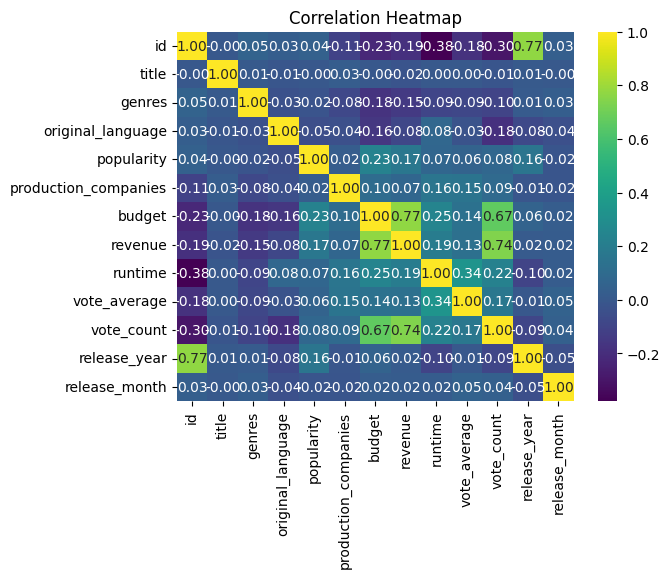

In [129]:
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

***Conclusion***

According this heatmap, votes and budget have highest correleation with revenue and title,original language,genere and production companies have weak correlation with revenue.

***Let's explore which genre is most liked by people***

In [132]:
df['genres_processed'] = df['genres'].apply(lambda x: x.split('-'))
df['genre_split'] = df['genres_processed'].apply(lambda x: x[0])

In [133]:
grouped_data = df.groupby(['genre_split'])['revenue'].sum().reset_index()
grouped_data

,genre_split,revenue
0,Action,82740959768
1,Adventure,30195595153
2,Animation,20104237158
3,Comedy,21470049337
4,Crime,5709661869
5,Documentary,319710909
6,Drama,23055944760
7,Family,12298160477
8,Fantasy,8309960725
9,History,963276015


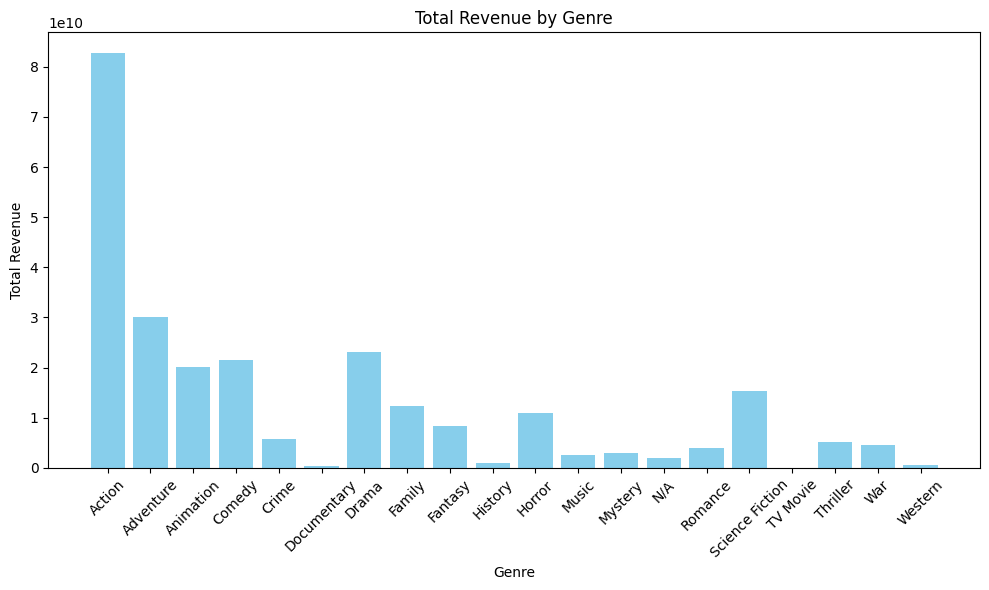

In [134]:
plt.figure(figsize=(10, 6))
plt.bar('genre_split', 'revenue', color='skyblue',data=grouped_data)
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Conclusion***

According to this graph, action movies have generated more revenue than other genres. Documentary,History movies have generated very least revenue.

***Explore which period is suitable for movie release***

In [135]:
grouped_monthdata = df.groupby(['release_month'])['revenue'].sum().reset_index()
grouped_monthdata

,release_month,revenue
0,1,10538042844
1,2,19064778444
2,3,19040014397
3,4,23134206646
4,5,22460857479
5,6,28035161037
6,7,27289007286
7,8,12979533315
8,9,18339683203
9,10,19548443370


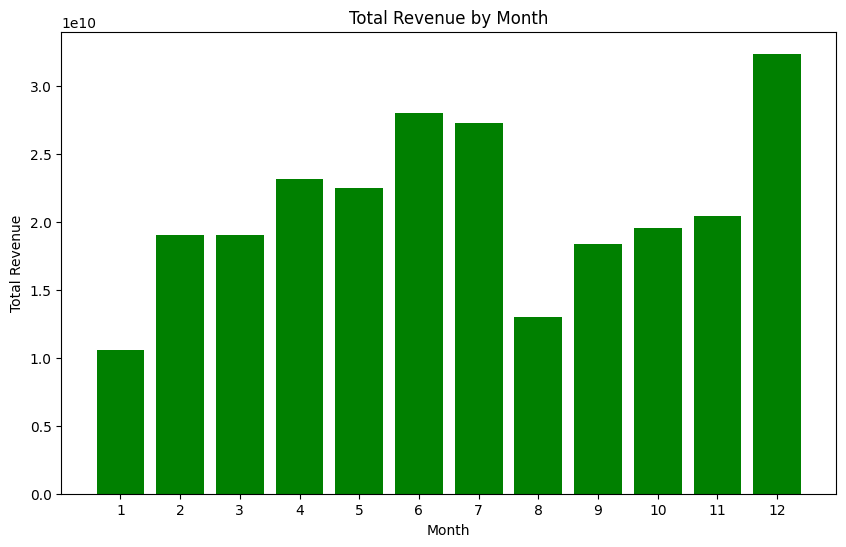

In [142]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_monthdata['release_month'], grouped_monthdata['revenue'], color='green')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.xticks(np.arange(1, 13))
plt.show()

***Conclusion***

According to this graph, best time to release movie is December. Reason could be December is typically associated with major holidays like Christmas , New Year's Eve. During this time people may have time off from work or school. Therefore, more likely to go for a movie as a form of entertainment.

***Explore ideal runtime for a movie***

In [144]:
grouped_runtimedata = df.groupby(['runtime'])['revenue'].sum().reset_index()
grouped_runtimedata

,runtime,revenue
0,0.0,1430889894
1,1.0,1000016322
2,2.0,1525280
3,3.0,40374
4,4.0,15202
...,...,...
205,280.0,1000000
206,300.0,3000
207,310.0,44840
208,383.0,2


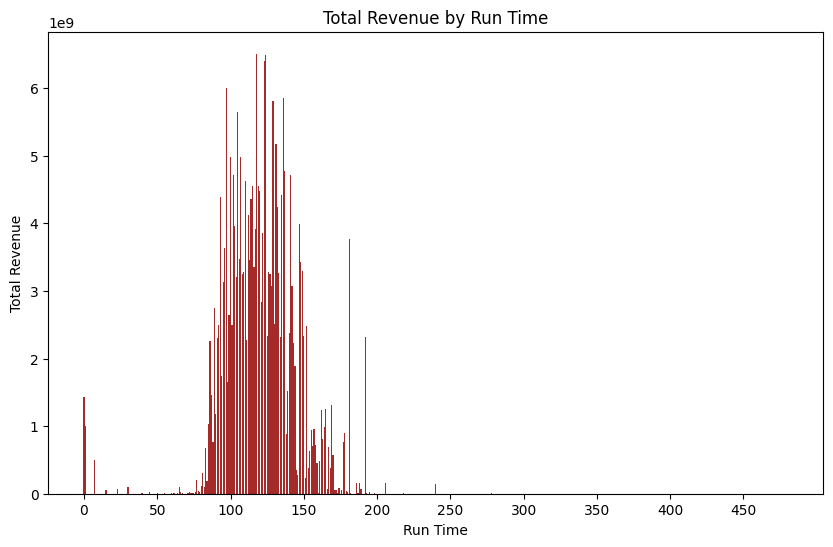

In [148]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_runtimedata['runtime'], grouped_runtimedata['revenue'], color='brown')
plt.xlabel('Run Time')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Run Time')
plt.xticks(range(min(grouped_runtimedata['runtime'].astype(int)), max(grouped_runtimedata['runtime'].astype(int))+1, 50))
plt.show()

***Conclusion***

According to graph, ideal time between 120 to 150 minutes.

**Movie analysis reveals that vote count and budget have a significant relationship with movie success. Further analysis indicates that action movies garner the most attention, and movies released in December achieve greater success compared to other months**